### WEBSCRAPPING OF TECHNOLOGY JOBS & ANALYSIS IN THE UK.

This project was a collaborative effort involving a team comprising Business Analysts, Data Engineers, and Data Scientists. Here's an overview of the project's phases and challenges encountered:

The project commenced with team meetings where Business Analysts conducted requirements elicitation to understand the project's business objectives, scope, assumptions, and potential risks. This crucial phase involved gathering insights from key stakeholders.

Data Engineers took charge of identifying suitable job sites for web scraping, focusing on platforms where data collection was feasible.

Web scraping activities were carried out across various job sites, and the harvested data was consolidated within a PostgreSQL database.

Subsequently, Data Scientists imported the data from the PostgreSQL database into Jupyter Notebook for in-depth data analysis.

#### Challenges Encountered During Web Scraping and Data Analysis:

- Incomplete Job Role Information: Many job listings lacked essential requirements and details.

- Challenges in Web Scraping: - Several job sites posed difficulties in data extraction, potentially due to site structures or restrictions.

- Data Integrity and Consistency: Issues arose regarding data integrity, inconsistencies, and variations in data quality.

- Missing Values and Irrelevant Tech Roles: Some data points contained missing values, and certain job listings were unrelated to the project's objectives.

- Non-Numeric Salary Representation: The salary feature contained non-numeric strings.

- Special Characters in Data: Special characters within the data posed challenges during analysis and processing.

#### Project Details:

Business Analysts played a pivotal role in guiding the project, facilitating team meetings, and maintaining documentation through tools like Jira. Each team member actively participated in updating Jira with progress on their assigned tasks.

Initial data scraping efforts yielded unsuitable data. After extensive discussions, Data Engineers revisited the web scraping process to acquire additional data for consolidation.

Regular project meetings were conducted to monitor progress and gather feedback from stakeholders, ensuring alignment with project objectives.

To overcome challenges, particularly those related to job titles, Data Scientists applied 'IF' functions to filter and rename job titles effectively.

Comprehensive data cleaning and preprocessing measures were implemented to ensure the quality of the data and prevent the "garbage in, garbage out" scenario.

Data mining activities focused on uncovering relationships and insights within the dataset, enabling the team to derive valuable information from the collected data.






![image](https://www.totaljobs.com/advice/wp-content/uploads/business-analyst-job-description-570x322.jpg)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Load the dataset
df1 = pd.read_excel(r"C:\Users\HENRY OKEOMA\Desktop\New Data\data final data final.xlsx")
df1.head(5)

,Job_Title_New,job_description,Job_Link,job_city,job_country,Date_posted,salary,Company,job_type,cleaned_salary,Newest Salary,Job_Site
0,Software/Developer,If you are looking to join a high tech industr...,https://uk.linkedin.com/jobs/view/junior-javas...,Newtown,GB,2023-07-27 00:00:00,27000,CareerAddict,Full-time,27000,27000,LinkedIn
1,Software/Developer,If you are looking to join a high tech industr...,https://uk.linkedin.com/jobs/view/junior-javas...,Branston,GB,2023-07-27 00:00:00,27000,GSA Techsource Ltd,Full-time,27000,27000,LinkedIn
2,Software/Developer,Lead C++ Games Developer | AAA Games | 90k | M...,https://uk.linkedin.com/jobs/view/lead-c%2B%2B...,London,GB,2023-08-09 00:00:00,80000,Langham Recruitment,Full-time,80000,80000,LinkedIn
3,Cyber Security/IT Expert,Location: We operate a working model and full...,https://uk.linkedin.com/jobs/view/cyber-securi...,London,GB,2023-08-09 00:00:00,59400,Office for National Statistics,Full-time,59400,59400,LinkedIn
4,Data Analyst,NaN,https://www.charityjob.co.uk/jobs/understandin...,London,GB,2023-08-09 00:00:00,"40,000 - 46,000",Understanding Recruitment Ltd,NaN,46,46000,CharityJob


In [4]:
# Dimensionality
df1.shape

(13827, 12)

In [5]:
# Check for missing data
df1.isnull().sum()

Job_Title_New         0
job_description     221
Job_Link              1
job_city              0
job_country           0
Date_posted        4663
salary                0
Company               0
job_type           6944
cleaned_salary        0
Newest Salary         0
Job_Site              2
dtype: int64

### We have some missing data in some features, as above, we shall forward fill the date column and use median to replace the Job_type and job_site

In [6]:
# Check for duplicates
df1.duplicated().sum()

0

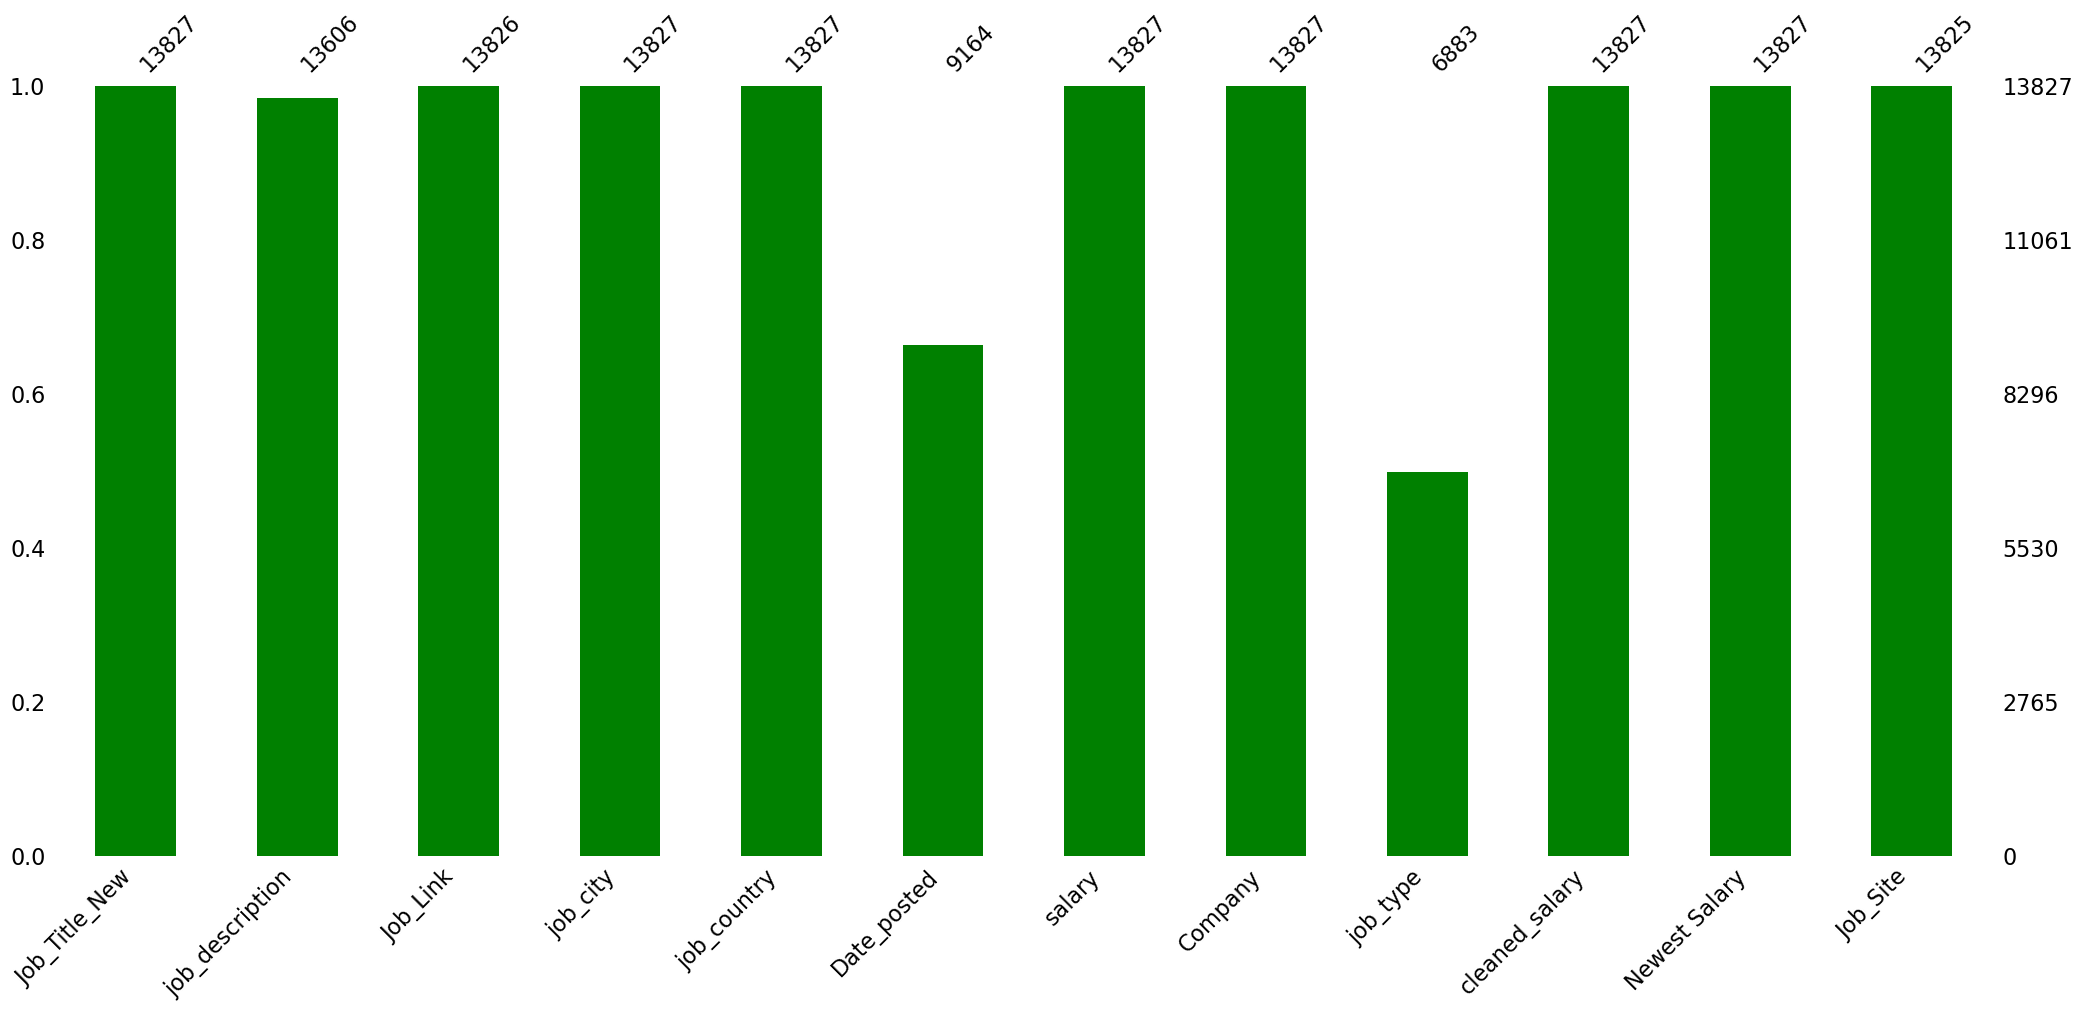

In [7]:
# Visualise the missing Data
plt.figure(figsize=(8,3))
msno.bar(df1, color="green");

### Date posted and Job_type have the higheste missing values

In [8]:
df1.columns

Index(['Job_Title_New', 'job_description', 'Job_Link', 'job_city',
       'job_country', 'Date_posted', 'salary', 'Company', 'job_type',
       'cleaned_salary', 'Newest Salary', 'Job_Site'],
      dtype='object')

In [10]:
# Exclude some features in our new dataframe such as joblink, salary, cleaned_salary
df2 = df1[['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type',
        'Newest Salary']]

In [11]:
df2.head(5)

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary
0,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Newtown,GB,2023-07-27 00:00:00,CareerAddict,Full-time,27000
1,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Branston,GB,2023-07-27 00:00:00,GSA Techsource Ltd,Full-time,27000
2,Software/Developer,Lead C++ Games Developer | AAA Games | 90k | M...,LinkedIn,London,GB,2023-08-09 00:00:00,Langham Recruitment,Full-time,80000
3,Cyber Security/IT Expert,Location: We operate a working model and full...,LinkedIn,London,GB,2023-08-09 00:00:00,Office for National Statistics,Full-time,59400
4,Data Analyst,NaN,CharityJob,London,GB,2023-08-09 00:00:00,Understanding Recruitment Ltd,NaN,46000


In [12]:
# Convert Date_posted to datetime format
df2['Date_posted'] = pd.to_datetime(df2['Date_posted'])

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\2653005081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date_posted'] = pd.to_datetime(df2['Date_posted'])


In [13]:
# Forward Filling; This approach fills missing values with the previous non-missing value in the column, 
# on the assumption that the missing values are in a consecutive order

df2["Date_posted"].fillna(method="ffill", inplace=True)

# Display the new
df2.isnull().sum()

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\290245343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date_posted"].fillna(method="ffill", inplace=True)


Job_Title_New         0
job_description     221
Job_Site              2
job_city              0
job_country           0
Date_posted           0
Company               0
job_type           6944
Newest Salary         0
dtype: int64

### We have filled our date column using forward fill to eliminate the missing values

In [14]:
df2['job_type'].mode()

0    Permanent
Name: job_type, dtype: object

In [15]:
df2['Job_Site'].mode()

0    Simplyhired
Name: Job_Site, dtype: object

In [16]:
df2.groupby('job_type').count()

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,Newest Salary
job_type,,,,,,,,
Apprenticeship,93,93,93,93,93,93,93,93
Contract,540,539,540,540,540,540,540,540
Full-time,2065,1969,2065,2065,2065,2065,2065,2065
"Full-time , Temporary",25,25,25,25,25,25,25,25
Full-time-Contract,185,185,185,185,185,185,185,185
Internship,2,2,2,2,2,2,2,2
Part-time,68,68,68,68,68,68,68,68
Permanent,3729,3729,3729,3729,3729,3729,3729,3729
Temp,176,176,176,176,176,176,176,176


In [17]:
# Fill the missing values in the Jobtype with the mode
df2['job_type'] = df2['job_type'].fillna('Permanent')

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\489822160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['job_type'] = df2['job_type'].fillna('Permanent')


In [18]:
# Fill the missing values in the Jobsite with the mode
df2['Job_Site'] = df2['Job_Site'].fillna('Simplyhired')

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\2608231546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Job_Site'] = df2['Job_Site'].fillna('Simplyhired')


In [19]:
# Display the new
df2.isnull().sum()

Job_Title_New        0
job_description    221
Job_Site             0
job_city             0
job_country          0
Date_posted          0
Company              0
job_type             0
Newest Salary        0
dtype: int64

In [20]:
# We still have missing information on the Job description, we shall drop it.
df2.dropna(subset=['job_description'],inplace=True)
df2.isna().sum()

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\4194541518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['job_description'],inplace=True)


Job_Title_New      0
job_description    0
Job_Site           0
job_city           0
job_country        0
Date_posted        0
Company            0
job_type           0
Newest Salary      0
dtype: int64

### We have replaced all that is required and we can commence further analysis and visuals

In [21]:
df2.shape

(13606, 9)

In [22]:
#Display the 5 largest Salary
df2.nlargest(5,"Newest Salary")

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary
11442,Software/Developer,Join a global aerospace and defence company as...,Totaljobs,Bristol,GB,2023-08-09,JAM Recruitment Ltd,Permanent,172800
4085,Senior/vp/team lead,Posted:about 1 month ago\nSector: Software Eng...,Simplyhired,London,GB,2023-02-08,Xcede,Permanent,165000
4117,Senior/vp/team lead,Posted:about 1 month ago\nSector: Software Eng...,Simplyhired,London,GB,2023-03-08,Xcede,Permanent,165000
11257,Devops Programmer,IR35 Status: Outside - Rate: 175 - 225 p/d per...,Totaljobs,London,GB,2023-08-09,In Technology Group Limited,Permanent,151000
340,Software/Developer,The successful Staff Engineer / Staff Full Sta...,CV-Library,London,GB,2023-01-08,People Source Consulting,Permanent,150000


In [23]:
# #Display the 5 smallest Salary
df2.nsmallest(5,"Newest Salary")

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary
1114,Data Analyst,Job title: First Line Support Analyst (5 Days ...,CV-Library,Farnborough,GB,2023-07-27,Randstad Technologies Recruitment,Contract,150
2559,Data Analyst,Performance & Insight AnalystFull Time Salary3...,Simplyhired,Manchester,GB,2023-07-26,Onward Homes,Full-time,150
2630,Data Analyst,QA Analyst - UK Leading Technology Firm - - L...,Simplyhired,London,GB,2023-07-31,Noir Consulting,Permanent,150
4235,Software/Developer,Company Description\n\nCome join us and make a...,Simplyhired,Bracknell,GB,2023-02-08,NEC Software Solutions,Full-time,150
4241,Software/Developer,Company Description\n\nCome join us and make a...,Simplyhired,Bracknell,GB,2023-07-25,NEC Software Solutions,Full-time,150


In [24]:
# Create the Year, month, month_name from the date.
df2['Year'] = df2['Date_posted'].dt.year
df2['Month'] = df2['Date_posted'].dt.month
df2['Month_name'] = df2['Date_posted'].dt.month_name()
df2['Day of week'] = df2['Date_posted'].dt.day_name()


C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\451718312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Date_posted'].dt.year
C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\451718312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date_posted'].dt.month
C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\451718312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [25]:
df2.head(5)

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary,Year,Month,Month_name,Day of week
0,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Newtown,GB,2023-07-27,CareerAddict,Full-time,27000,2023,7,July,Thursday
1,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Branston,GB,2023-07-27,GSA Techsource Ltd,Full-time,27000,2023,7,July,Thursday
2,Software/Developer,Lead C++ Games Developer | AAA Games | 90k | M...,LinkedIn,London,GB,2023-08-09,Langham Recruitment,Full-time,80000,2023,8,August,Wednesday
3,Cyber Security/IT Expert,Location: We operate a working model and full...,LinkedIn,London,GB,2023-08-09,Office for National Statistics,Full-time,59400,2023,8,August,Wednesday
5,Software/Developer,Game Animation Developer (C++ Unreal Engine 5 ...,LinkedIn,London,GB,2023-07-27,Client Server,Full-time,55000,2023,7,July,Thursday


In [27]:
from scipy.stats import skew, kurtosis
# We need to filter the dataframe into Gross Salary and per week/per day pay

#let filter out for the salary values greater than 15,000
df = df2[df2["Newest Salary"]>=14000]
df.head(2)

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary,Year,Month,Month_name,Day of week
0,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Newtown,GB,2023-07-27,CareerAddict,Full-time,27000,2023,7,July,Thursday
1,Software/Developer,If you are looking to join a high tech industr...,LinkedIn,Branston,GB,2023-07-27,GSA Techsource Ltd,Full-time,27000,2023,7,July,Thursday


In [28]:
df.shape

(11437, 13)

In [29]:
#let filter out for the salary values less than 15,000
df_perday = df2[df2["Newest Salary"]<14000]
df_perday.head(2)

,Job_Title_New,job_description,Job_Site,job_city,job_country,Date_posted,Company,job_type,Newest Salary,Year,Month,Month_name,Day of week
21,Cyber Security/IT Expert,Cyber Security Specialist\nCyber Security Spec...,Reed,London,GB,2023-08-09,REED,Full-time,750,2023,8,August,Wednesday
220,Software/Developer,Senior Frontend Developer. Daily rate: â‚¬500....,CV-Library,Dublin,N.Ireland,2023-07-27,Reperio Human Capital,Contract,431,2023,7,July,Thursday


In [30]:
df_perday.shape

(2169, 13)

## Univariate Analysis

1.1523101808208756
1.5523499541884047


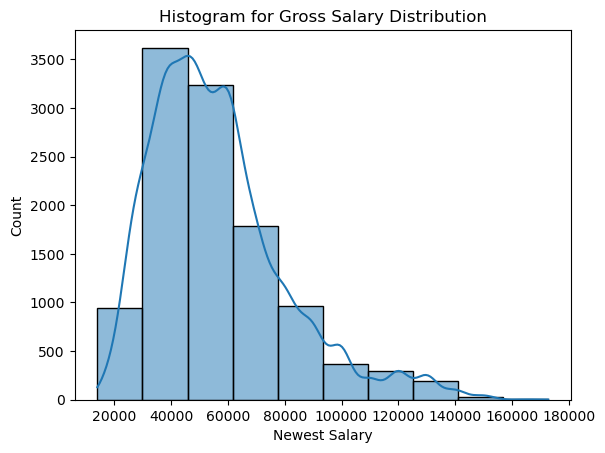

In [31]:
# Histogram of Gross Salary Distribution
plt.title('Histogram for Gross Salary Distribution')
sns.histplot(x='Newest Salary', data=df, kde=True, bins=10)
print(df['Newest Salary'].skew())
print(df['Newest Salary'].kurtosis());

### Most of the salaries are centered between 40k to 60k per annum
### Skewness = 1.15: which signifies a positively skewed distribution of the gross salary (Skewed to the right) 
### Kurtosis = 1.55: figure less than 3, which signifies a low kurtosis, not much of tailing to the right (Platykurtic distributions)

4.020910310139799
18.712414424176202


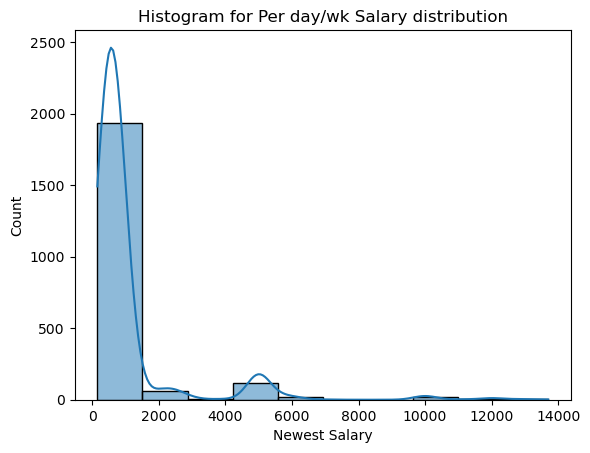

In [30]:
# Histogram of Gross Salary Distribution
plt.title('Histogram for Per day/wk Salary distribution')
sns.histplot(x='Newest Salary', data=df_perday, kde=True, bins=10)
print(df_perday['Newest Salary'].skew())
print(df_perday['Newest Salary'].kurtosis());

### Because of the inconsistencies in the data, we are not sure if the above histogram is true 
### representation as we have limited information as to if this is per day, per week etc

In [32]:
df.columns

Index(['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type', 'Newest Salary',
       'Year', 'Month', 'Month_name', 'Day of week'],
      dtype='object')

C:\Users\HENRY OKEOMA\AppData\Local\Temp\ipykernel_23028\2557724339.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt3.set_xticklabels(plt3.get_xticklabels(), fontsize=20)


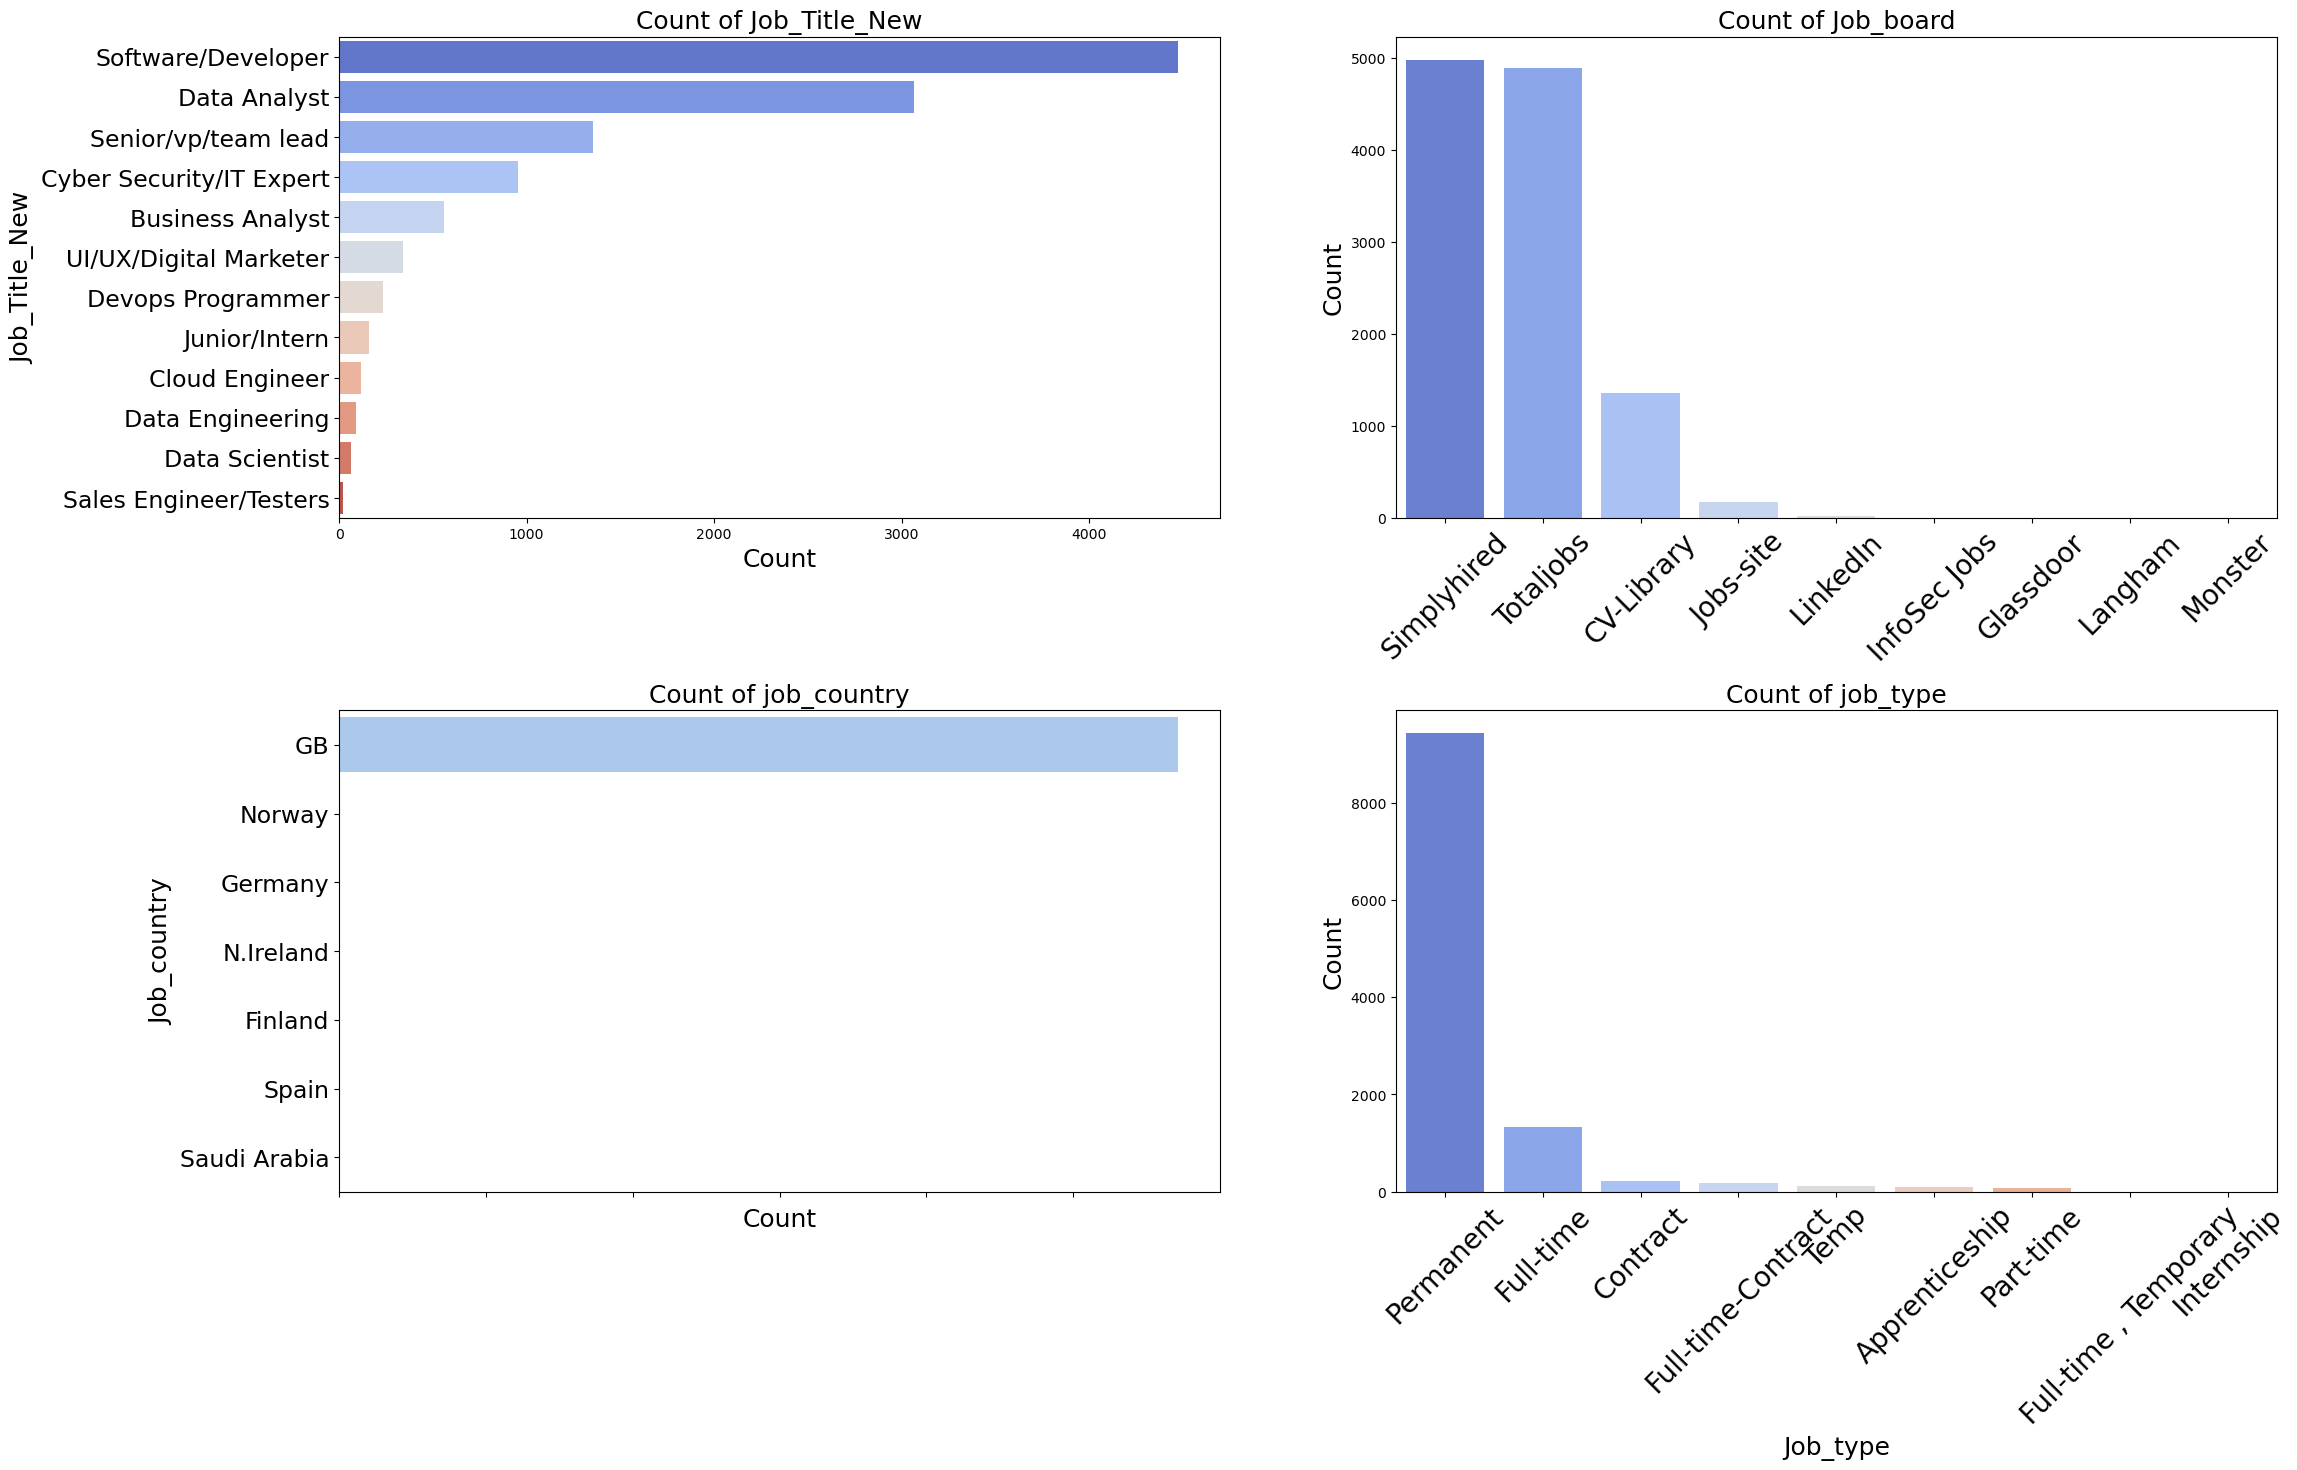

In [35]:
#We shall use the Countplot to visualise the Categorical columns

fig, axs = plt.subplots(2,2, figsize = (25,15))

axs[0, 0].set_title('Count of Job_Title_New', fontsize=18)
job_title_order = df['Job_Title_New'].value_counts().index 
plt1 = sns.countplot(y='Job_Title_New', palette='coolwarm', data=df, ax=axs[0, 0], order=job_title_order)
plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=20)

# Increase the font size of y-axis tick labels
plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=17)

axs[0, 1].set_title('Count of Job_board', fontsize=18)
job_site_order = df['Job_Site'].value_counts().index 
plt2 = sns.countplot(x='Job_Site', palette='coolwarm', data=df, ax=axs[0, 1], order=job_site_order)
plt2.set_xticklabels(plt2.get_xticklabels(), fontsize=20, rotation=45)

axs[1,0].set_title('Count of job_country', fontsize=18)
plt3 = sns.countplot(y ='job_country', palette='pastel', data=df, ax = axs[1,0])
plt3.set_xticklabels(plt3.get_xticklabels(), fontsize=20)

# Increase the font size of y-axis tick labels
plt3.set_yticklabels(plt3.get_yticklabels(), fontsize=17)

axs[1, 1].set_title('Count of job_type', fontsize=18)
job_type_order = df['job_type'].value_counts().index 
plt4 = sns.countplot(x='job_type', data=df, palette='coolwarm', ax=axs[1, 1], order=job_type_order)
plt4.set_xticklabels(plt4.get_xticklabels(), fontsize=20, rotation=45)

# Increase the label font size
plt1.set_ylabel('Job_Title_New', fontsize=18)
plt1.set_xlabel('Count', fontsize=18)
plt2.set_xlabel('Job_Site', fontsize=12)
plt2.set_ylabel('Count', fontsize=18)
plt2.set_xlabel('')
plt3.set_ylabel('Job_country', fontsize=18)
plt3.set_xlabel('Count', fontsize=18)
plt4.set_ylabel('Count', fontsize=18)
plt4.set_xlabel('Job_type', fontsize=18)


plt.subplots_adjust(hspace=0.4)
plt.show()

### When examining job titles, roles such as software developers and data analysts stand out as highly available and in demand. Following closely behind are positions like senior professionals, vice presidents, team leads, and cybersecurity experts. In contrast, roles such as data scientists and sales engineers/testers have fewer job openings.

### In terms of job sites, platforms like SimplyHired and Total Jobs stand out as the most preferred among job seekers. CV-Library also holds a notable position, while other platforms have comparably fewer listings.

### While the dataset encompasses job listings from various countries, the majority are concentrated in Great Britain. This underscores the project's focus on catering to employment opportunities specifically within the UK.

### Among different job types, permanent and full-time positions exhibit a significant prevalence. On the other end of the spectrum, internships are the least common job type encountered in the dataset.

In [36]:
### Job city count to see which city is most predominant
df['job_city'].nunique()

1144

### we have about 1,144 unique Job cities in our data set, we shall visualise the most popular and the least popular

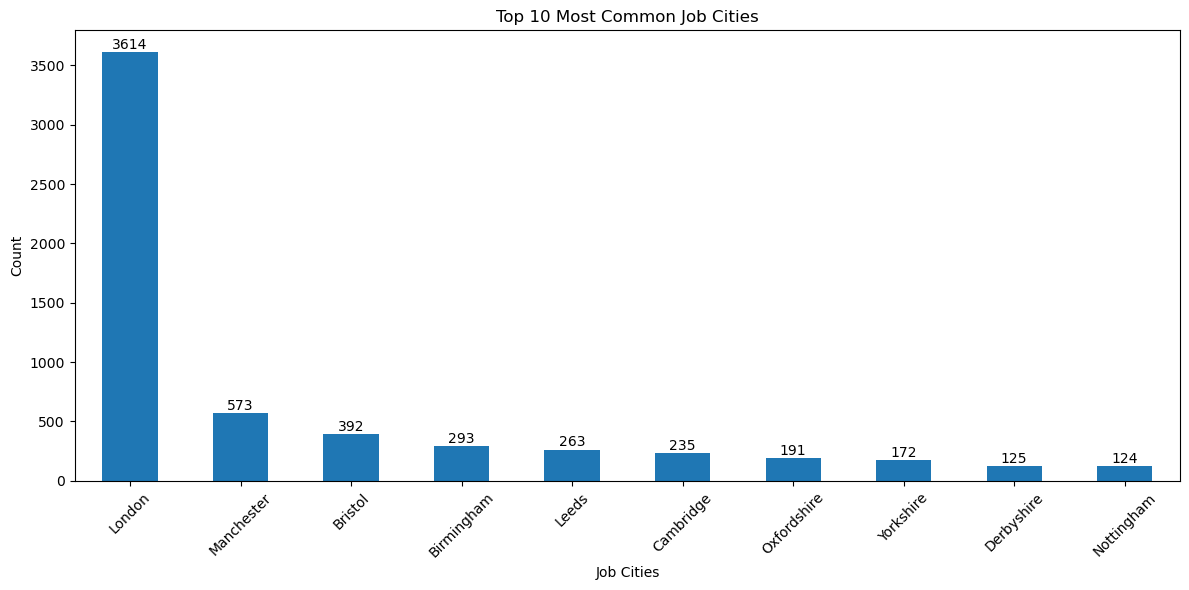

In [37]:
top_n = 10  # Number of top cities in Job city feature

# Get the counts of unique job cities
city_counts = df['job_city'].value_counts()

# Select the top N most common job cities
top_cities = city_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_cities.plot(kind='bar')
plt.xlabel('Job Cities')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Common Job Cities')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels above the bars
for idx, count in enumerate(top_cities):
    ax.text(idx, count + 1, str(count), ha='center', va='bottom')

plt.show()

### London stands out as the city with the highest job counts, followed by Manchester, Bristol, and Birmingham. We have no representation for nothern cities like Glasgow.

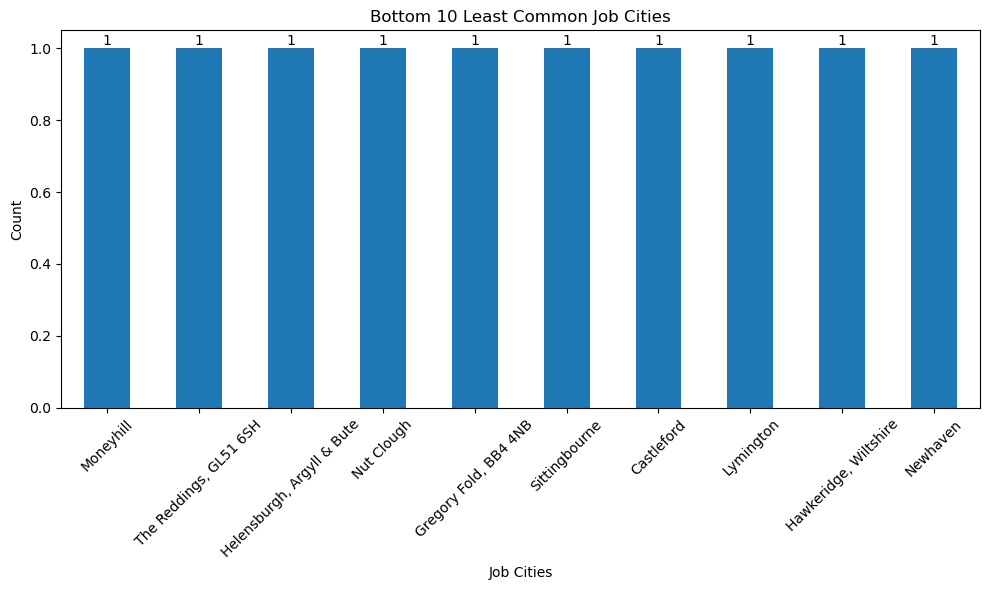

In [38]:
bottom_n = 10  # Number of bottom cities in Job city

# Get the counts of unique job cities
city_counts = df['job_city'].value_counts()

# Select the bottom N least common job cities
bottom_cities = city_counts.tail(bottom_n)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = bottom_cities.plot(kind='bar')
plt.xlabel('Job Cities')
plt.ylabel('Count')
plt.title(f'Bottom {bottom_n} Least Common Job Cities')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for idx, count in enumerate(bottom_cities):
    ax.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

### least popular Job cities in our scraped data

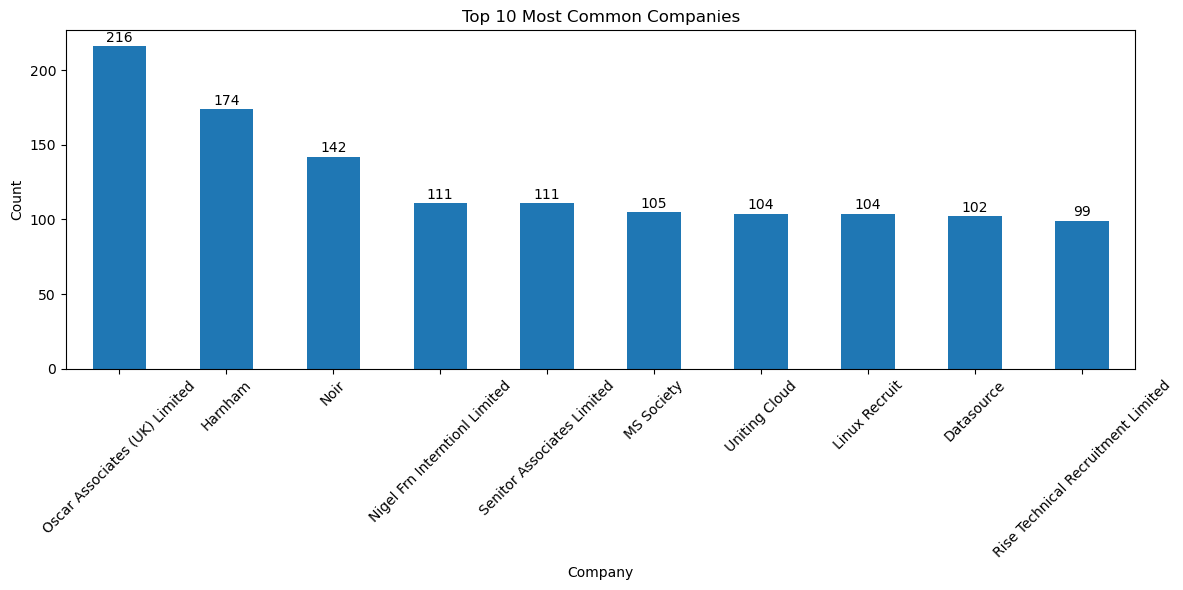

In [36]:
top_n = 10  # Number of top 10 companies in our data

# Get the counts of unique job cities
company_counts = df['Company'].value_counts()

# Select the top N most common job cities
top_company = company_counts.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = top_company.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Common Companies')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels above the bars
for idx, count in enumerate(top_company):
    ax.text(idx, count + 1, str(count), ha='center', va='bottom')

plt.show()

### In our dataset, the top 10 recruiting entities, which may encompass companies as well as agencies, are as above

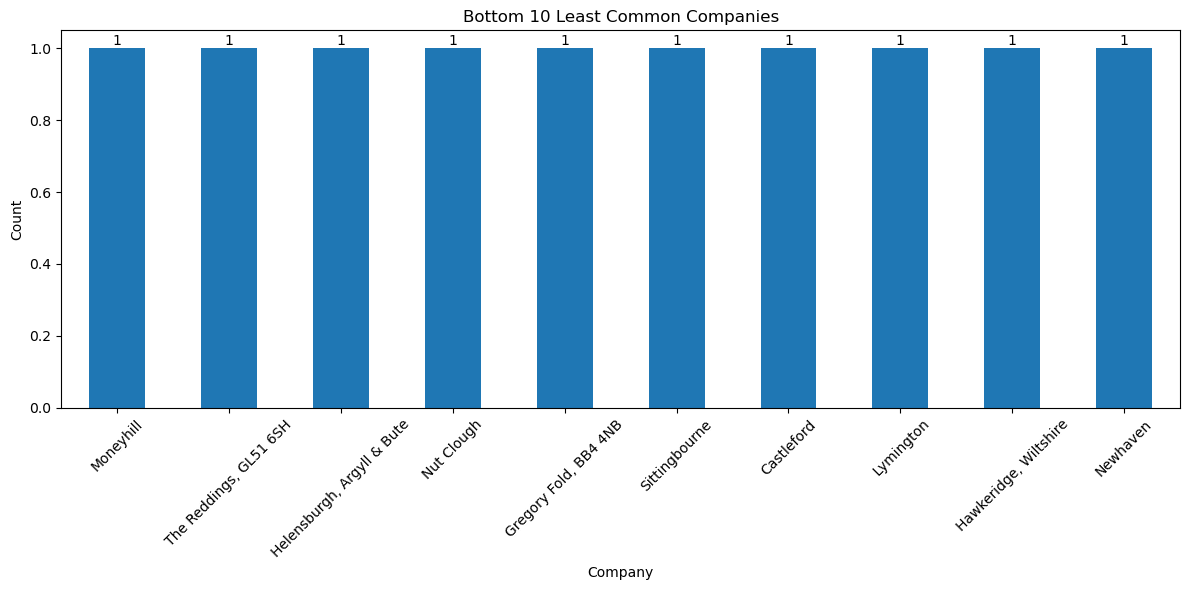

In [37]:
bottom_n = 10  # Number of bottom companies

# Get the counts of unique job cities
company_counts1 = df['job_city'].value_counts()

# Select the bottom N least common job cities
bottom_companies = company_counts1.tail(bottom_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = bottom_companies.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title(f'Bottom {bottom_n} Least Common Companies')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for idx, count in enumerate(bottom_companies):
    ax.text(idx, count, str(count), ha='center', va='bottom')

plt.show()

In [38]:
df.columns

Index(['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type', 'Newest Salary',
       'Year', 'Month', 'Month_name', 'Day of week'],
      dtype='object')

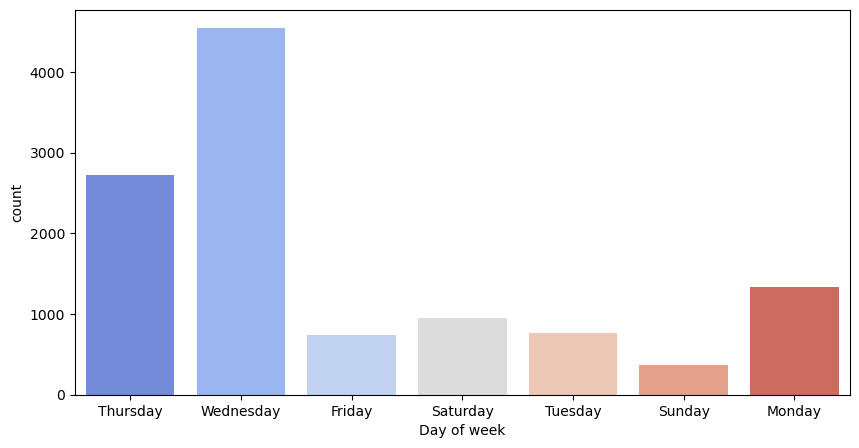

In [46]:
# Count of day of week where Jobs are posted
plt.figure(figsize=(10,5))
sns.countplot(x='Day of week', data=df, palette='coolwarm');

### The job sites saw the highest volume of job-openings being posted on Wednesday and Thursday, making them the most favored days..

## Bivariate Analysis
- With emphasis on Salary

In [47]:
df.columns

Index(['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type', 'Newest Salary',
       'Year', 'Month', 'Month_name', 'Day of week'],
      dtype='object')

In [48]:
# We shall check which Job titles have the highest average salary.
av_sal = df.groupby('Job_Title_New')[['Newest Salary']].median().sort_values(by='Newest Salary').astype(int)
av_sal

,Newest Salary
Job_Title_New,
Junior/Intern,32000
Data Analyst,41477
UI/UX/Digital Marketer,43000
Sales Engineer/Testers,45000
Business Analyst,55000
Cyber Security/IT Expert,55000
Software/Developer,56000
Data Engineering,60000
Devops Programmer,60000


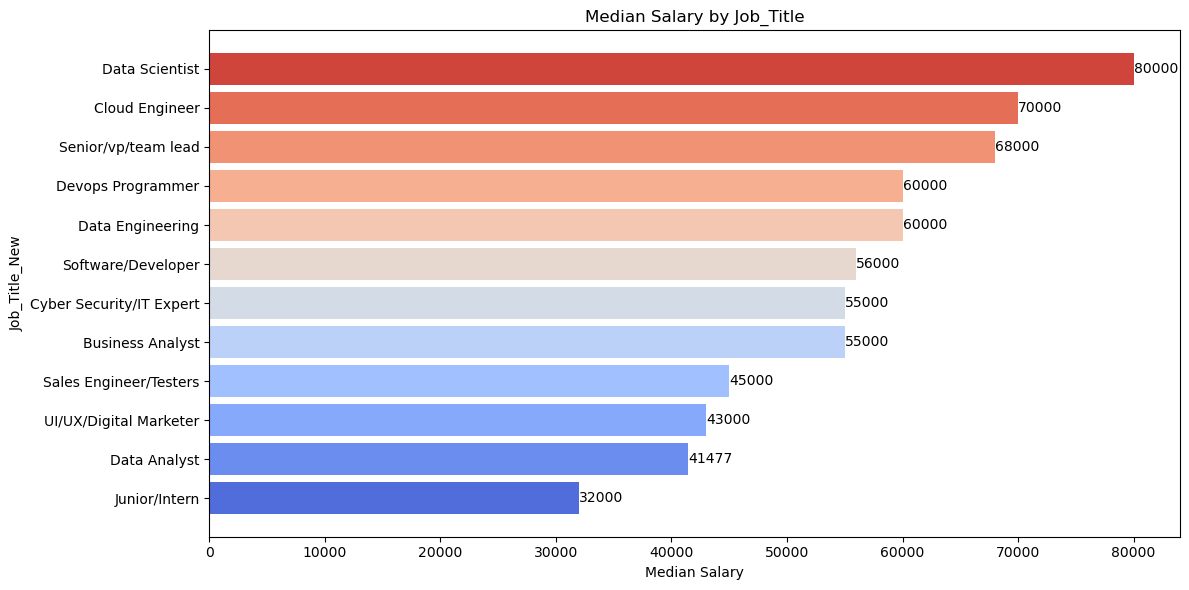

In [50]:
# Plot the above
# Resetting the index to access 'Job_title' as a column
av_sal = av_sal.reset_index()  

# Create a bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(av_sal))  

# Create the bar plot
plt.barh(av_sal['Job_Title_New'], av_sal['Newest Salary'], color=colors)

# Adding labels to the bars
for i, salary in enumerate(av_sal['Newest Salary']):
    plt.text(salary, i, str(salary), va='center', fontsize=10)

# Set labels and title
plt.xlabel('Median Salary')
plt.ylabel('Job_Title_New')
plt.title('Median Salary by Job_Title')

# Show the plot
plt.tight_layout()
plt.show()

### Data scientists, cloud engineers, senior/vp/lead positions occupy the top spots in terms of median salary, outperforming all other job titles. On the other hand, data analysts, interns, and UI/UX digital marketers are at the lower end of the salary spectrum

In [51]:
# We shall also check if there is a relationship between Job site and average salary
av_sal1 = df.groupby('Job_Site')[['Newest Salary']].mean().sort_values(by='Newest Salary').astype(int)
av_sal1

,Newest Salary
Job_Site,
Glassdoor,29137
Jobs-site,43575
CV-Library,46073
Monster,50000
Simplyhired,56840
Totaljobs,59056
LinkedIn,59827
Langham,70000
InfoSec Jobs,114702


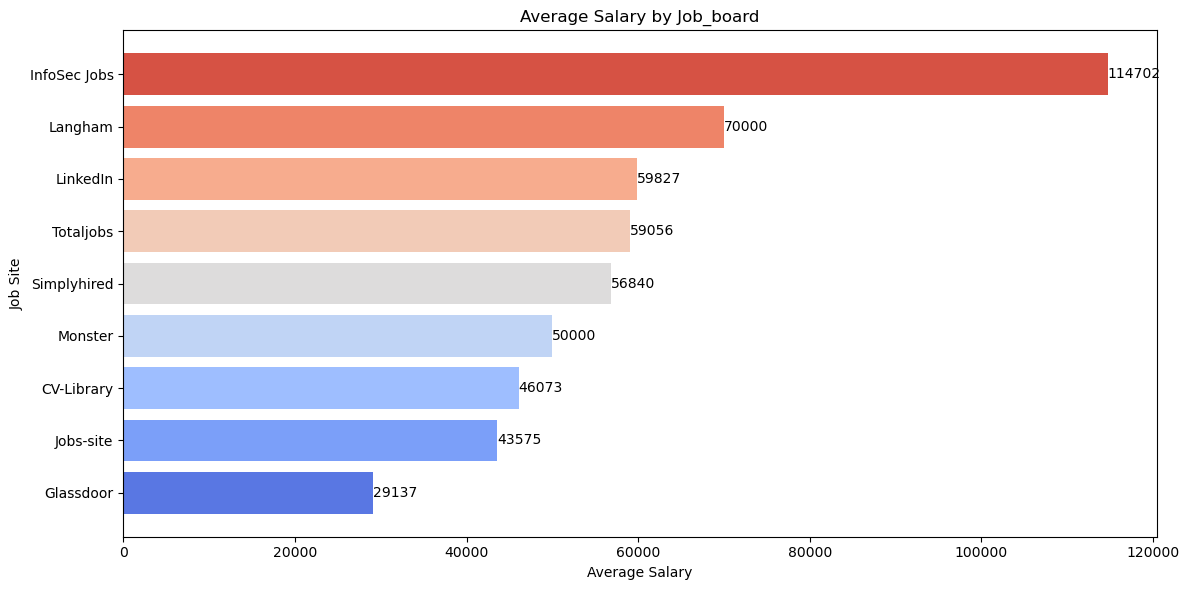

In [52]:
# Plot the above
 # Resetting the index to access 'Job_Site' as a column
av_sal1 = av_sal1.reset_index() 

# Create a bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(av_sal1))  

# Create the bar plot
plt.barh(av_sal1['Job_Site'], av_sal1['Newest Salary'], color=colors)

# Adding labels to the bars
for i, salary in enumerate(av_sal1['Newest Salary']):
    plt.text(salary, i, str(salary), va='center', fontsize=10)

# Set labels and title
plt.xlabel('Average Salary')
plt.ylabel('Job Site')
plt.title('Average Salary by Job_board')

# Show the plot
plt.tight_layout()
plt.show()

### InfoSec jobs, langham and Likedin returned the top Job sites with highest avarege salary. Glassdoor is the least

In [53]:
# We shall also check if there is a relationship between Job city and median salary
av_sal2 = df.groupby('job_city')[['Newest Salary']].median().sort_values(by='Newest Salary', ascending=False).astype(int)
av_sal2

,Newest Salary
job_city,
Brentwood,140000
Baulmsholme,130000
Barons Court,120000
Broad Oak,120000
Sunbury-On-Thames,120000
...,...
Oldham,19863
Chatham,19500
Runcorn,19136


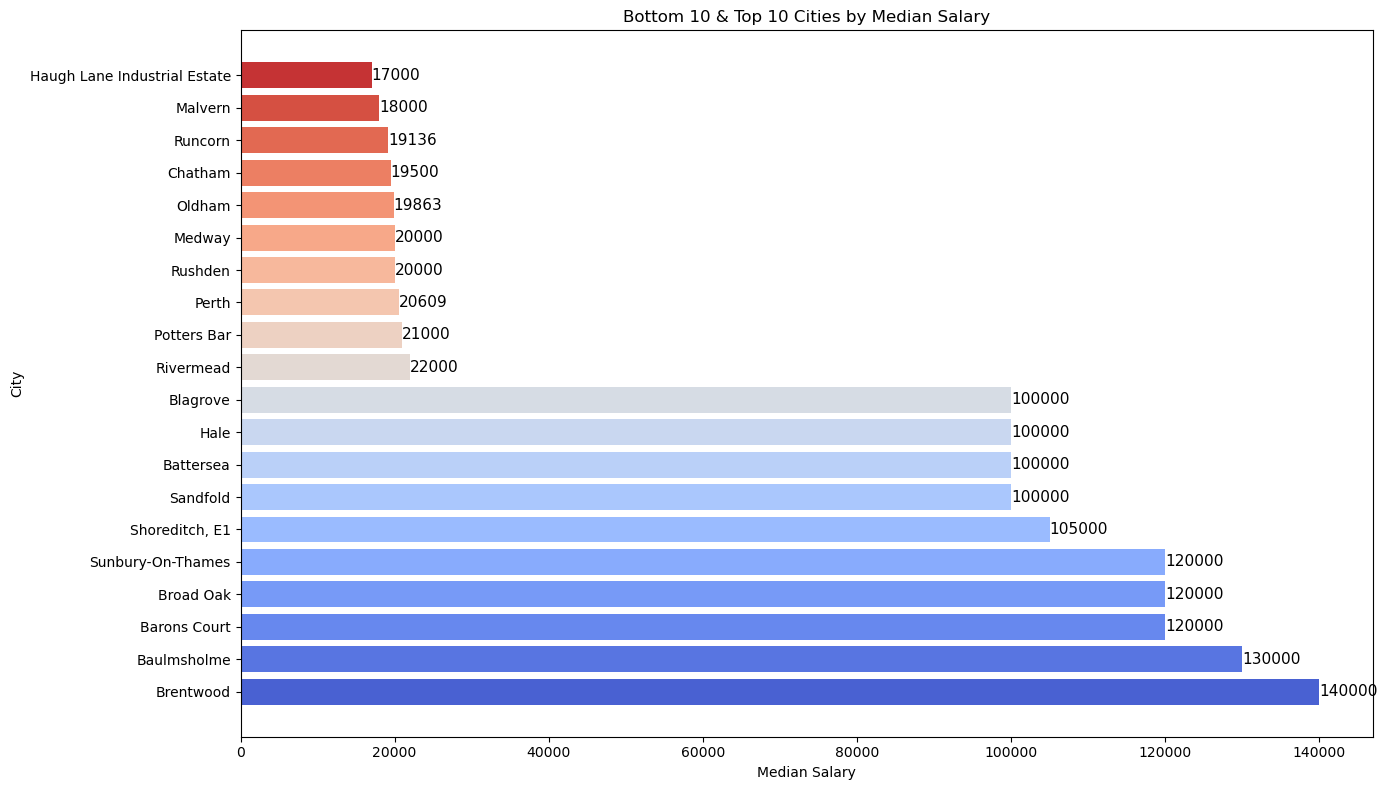

In [54]:
top_10_cities = av_sal2.head(10)
bottom_10_cities = av_sal2.tail(10)

# Combine the top and bottom DataFrames
combined_df = pd.concat([top_10_cities, bottom_10_cities])

# Create a bar plot
plt.figure(figsize=(14, 8))
colors = sns.color_palette("coolwarm", len(combined_df))  # You can choose another color palette

# Create the bar plot
plt.barh(combined_df.index, combined_df['Newest Salary'], color=colors)

# Adding labels to the bars
for i, salary in enumerate(combined_df['Newest Salary']):
    plt.text(salary, i, str(salary), va='center', fontsize=11)

# Set labels and title
plt.xlabel('Median Salary')
plt.ylabel('City')
plt.title('Bottom 10 & Top 10 Cities by Median Salary')

# Show the plot
plt.tight_layout()
plt.show()

### brentwood is the city with the highest median salary and Haugh lane is the least

### We had some cities in our univariate analysis which we saw were most popular. We shall select and see how what their median salary is

In [55]:
# Lets check what the median salary is in the 10 Most Popular cities which we saw above
selected_cities = ['London', 'Manchester', 'Bristol', 'Birmingham', 'Leeds', 'Cambridge',
                   'Oxfordshire', 'Yorkshire', 'Derbyshire', 'Glasgow']

# Filter the DataFrame to include only the selected cities
filtered_df = df[df['job_city'].isin(selected_cities)]

# Calculate the average salary for the selected cities
av_sal_selected_cities = filtered_df.groupby('job_city')[['Newest Salary']].median().sort_values(by='Newest Salary').astype(int)

# Display the average salary for the selected cities
print(av_sal_selected_cities)


             Newest Salary
job_city                  
Cambridge            38250
Yorkshire            43000
Derbyshire           45000
Birmingham           48000
Leeds                48000
Bristol              50000
Glasgow              50000
Oxfordshire          50000
Manchester           55000
London               60000


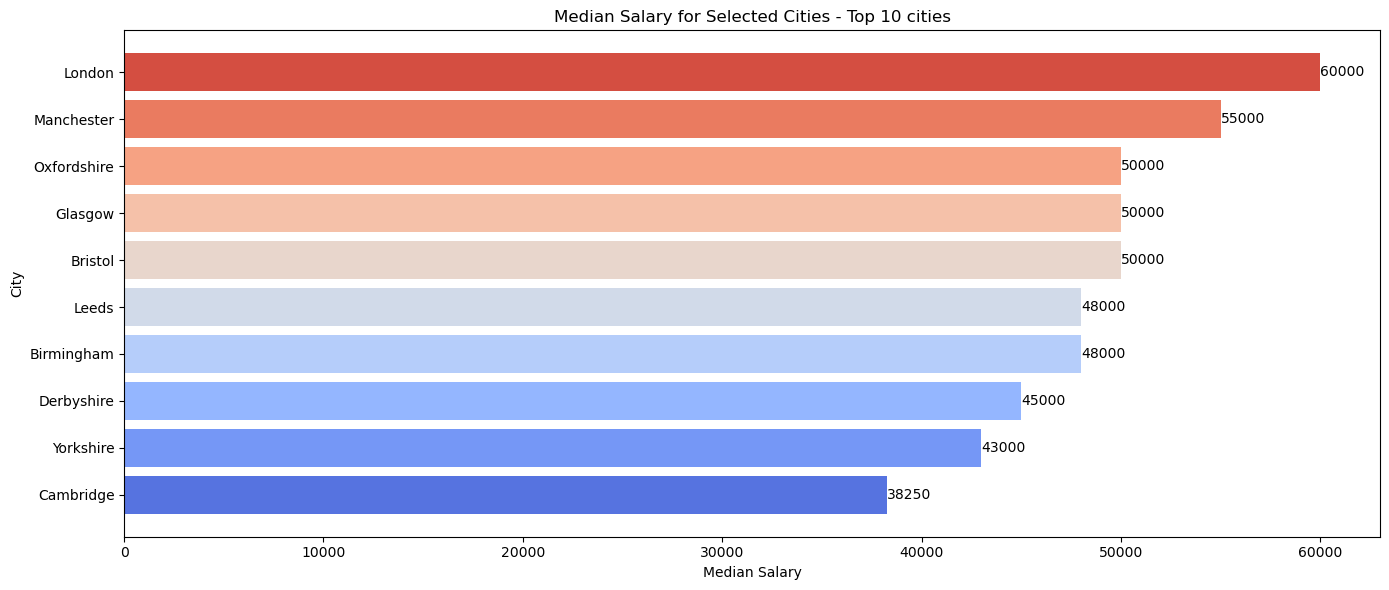

In [56]:
av_sal_selected_cities = av_sal_selected_cities.reset_index()  # Resetting the index to access 'job_city' as a column

# Create a bar plot
plt.figure(figsize=(14, 6))
colors = sns.color_palette("coolwarm", len(av_sal_selected_cities))

# Create the bar plot
plt.barh(av_sal_selected_cities['job_city'], av_sal_selected_cities['Newest Salary'], color=colors)

# Adding labels to the bars
for i, salary in enumerate(av_sal_selected_cities['Newest Salary']):
    plt.text(salary, i, str(salary), va='center', fontsize=10)

# Set labels and title
plt.xlabel('Median Salary')
plt.ylabel('City')
plt.title('Median Salary for Selected Cities - Top 10 cities')

# Show the plot
plt.tight_layout()
plt.show()

### Among the top 10 most popular cities, London stands out as having the highest average salary, with Manchester and Bristol also performing exceptionally well. Glasgow, the sole representative from Scotland, is a strong contender for the highest average salary as well.

In [57]:
# We shall also check if there is a relationship between Job type and average salary
av_sal4 = df.groupby('job_type')[['Newest Salary']].median().sort_values(by='Newest Salary', ascending=False).astype(int)
av_sal4

,Newest Salary
job_type,
"Full-time , Temporary",75411
Permanent,55000
Part-time,52000
Full-time-Contract,45666
Full-time,45000
Contract,42000
Temp,39798
Internship,24600
Apprenticeship,19863


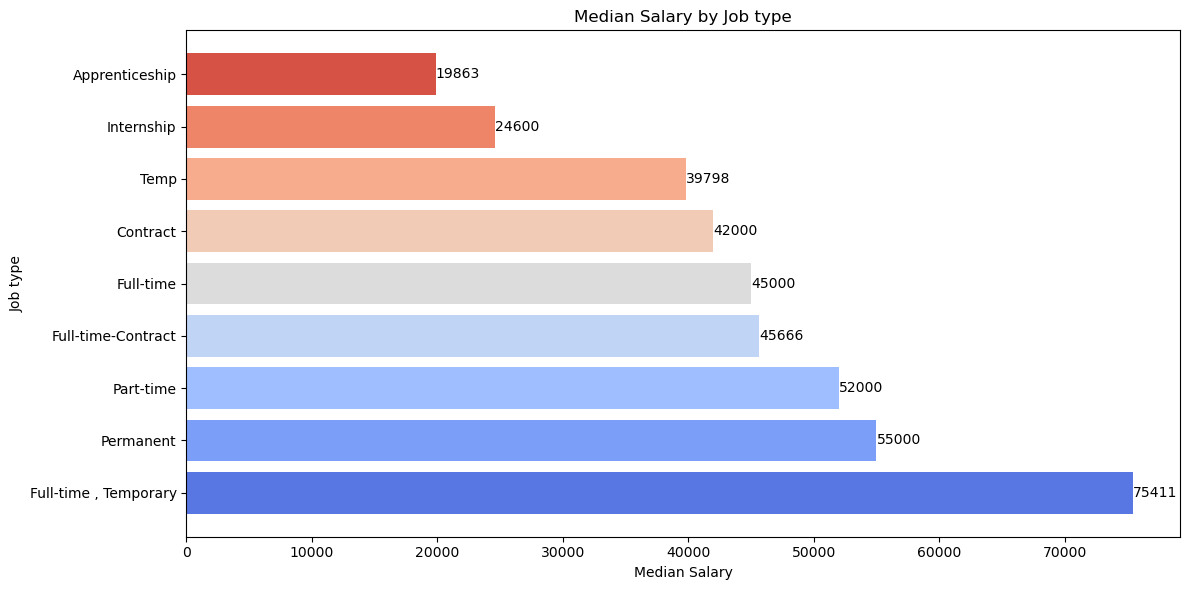

In [58]:
# Plot the above
av_sal4 = av_sal4.reset_index()  # Resetting the index to access 'Job_Site' as a column

# Create a bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(av_sal4))  

# Create the bar plot
plt.barh(av_sal4['job_type'], av_sal4['Newest Salary'], color=colors)

# Adding labels to the bars
for i, salary in enumerate(av_sal4['Newest Salary']):
    plt.text(salary, i, str(salary), va='center', fontsize=10)

# Set labels and title
plt.xlabel('Median Salary')
plt.ylabel('Job type')
plt.title('Median Salary by Job type')

# Show the plot
plt.tight_layout()
plt.show()

In [59]:
df.columns

Index(['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type', 'Newest Salary',
       'Year', 'Month', 'Month_name', 'Day of week'],
      dtype='object')

In [60]:
df['Job_Site'].unique()

array(['LinkedIn', 'InfoSec Jobs', 'Langham', 'Glassdoor', 'CV-Library',
       'Jobs-site', 'Monster', 'Totaljobs', 'Simplyhired'], dtype=object)

### Multi-Variate Analysis

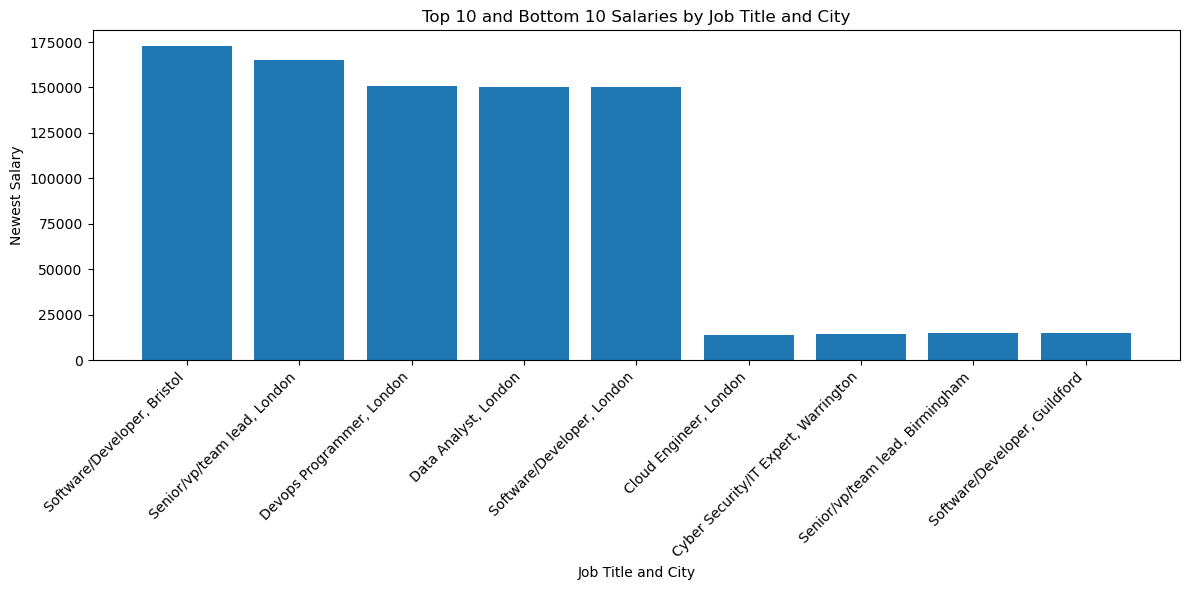

In [54]:
# Sort the DataFrame by 'Newest Salary' in descending order
df_sorted = df.sort_values(by='Newest Salary', ascending=False)

# Get the top 10 and bottom 10 entries
top_10 = df_sorted.nlargest(10, 'Newest Salary')
bottom_10 = df_sorted.nsmallest(10, 'Newest Salary')

# Combine the top and bottom DataFrames for plotting
combined_df = pd.concat([top_10, bottom_10])

# Create a bar plot to visualize the salaries
plt.figure(figsize=(12, 6))
plt.bar(combined_df['Job_Title_New'] + ', ' + combined_df['job_city'], combined_df['Newest Salary'])
plt.xlabel('Job Title and City')
plt.ylabel('Newest Salary')
plt.title('Top 10 and Bottom 10 Salaries by Job Title and City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Using the Natural language toolkit to analyse our Job description feature

In [56]:
df_nlp = df.copy()

In [57]:
import re

def clean_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df_nlp['job_description_clean'] = df_nlp['job_description'].apply(clean_text)

In [58]:
from nltk.tokenize import word_tokenize

df_nlp['tokens'] = df_nlp['job_description_clean'].apply(word_tokenize)

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HENRY
[nltk_data]     OKEOMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df_nlp['tokens'] = df_nlp['tokens'].apply(remove_stopwords)

In [61]:
from nltk.probability import FreqDist

all_tokens = [token for tokens in df_nlp['tokens'] for token in tokens]
fdist = FreqDist(all_tokens)

# Print the most common words
print(fdist.most_common(10))

[('data', 18667), ('experience', 18361), ('business', 15073), ('software', 14889), ('role', 13976), ('team', 13688), ('working', 13666), ('work', 12328), ('development', 11176), ('support', 8334)]


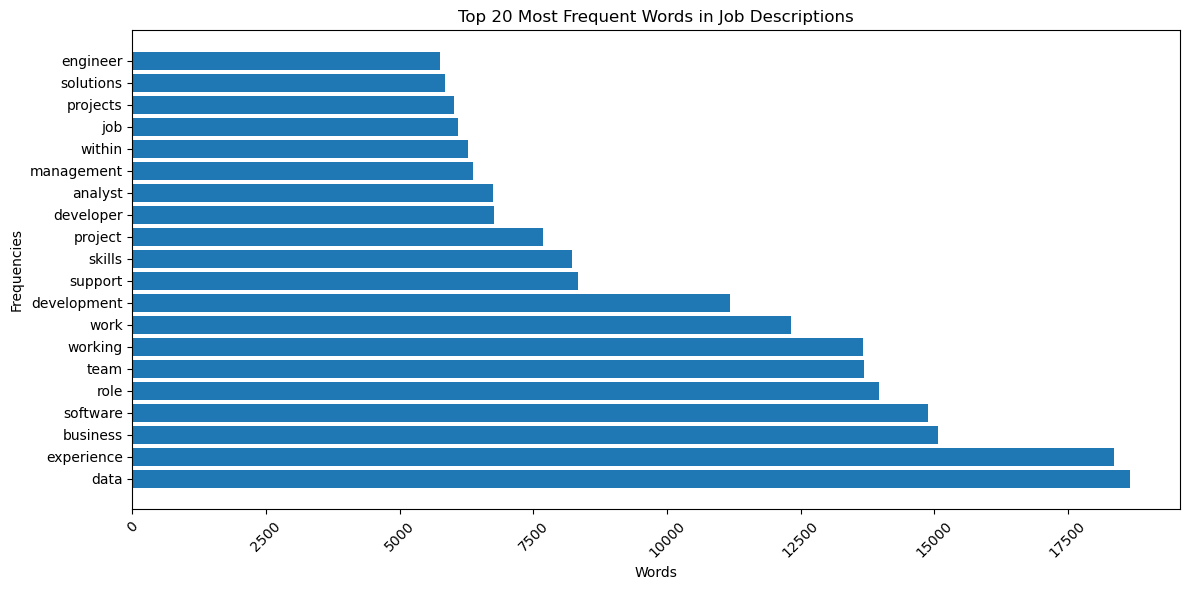

In [62]:
# Get the word frequencies
word_freq = fdist.most_common(20)  # Change the number to the top N words you want to visualize

# Extract words and their frequencies
words, frequencies = zip(*word_freq)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Frequent Words in Job Descriptions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

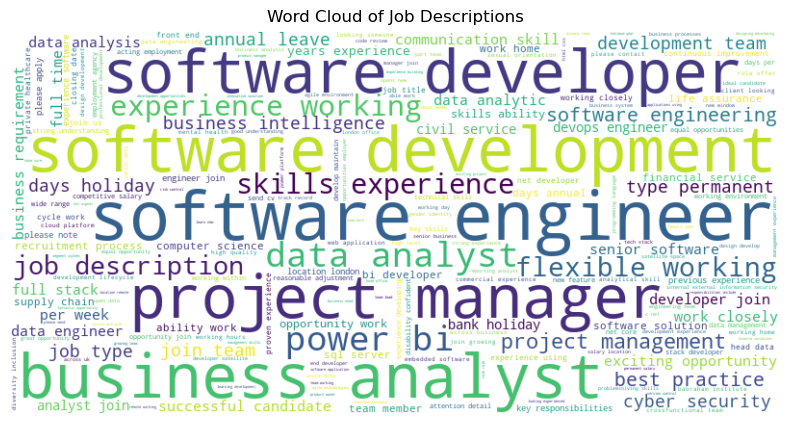

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single string
all_text = ' '.join(' '.join(tokens) for tokens in df_nlp['tokens'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

## Supervised Machine Learning to predict the Salary
### Feature Engineering/ Data Pre-Processing

### Target is Salary as newest salary feature

In [64]:
df.columns

Index(['Job_Title_New', 'job_description', 'Job_Site', 'job_city',
       'job_country', 'Date_posted', 'Company', 'job_type', 'Newest Salary',
       'Year', 'Month', 'Month_name', 'Day of week'],
      dtype='object')

In [65]:
dfmL = df.copy()

In [66]:
X = dfmL[['Job_Title_New', 'Job_Site', 'job_city','job_type']]

In [67]:
y = dfmL['Newest Salary']

In [68]:
# We need to change our categorical columns to dummies 
# (a variable that takes values of 0 and 1, where the values indicate the absence or presence of something
# in this case 0 = No and 1 = Yes)
X = pd.get_dummies(X)
X

,Job_Title_New_Business Analyst,Job_Title_New_Cloud Engineer,Job_Title_New_Cyber Security/IT Expert,Job_Title_New_Data Analyst,Job_Title_New_Data Engineering,Job_Title_New_Data Scientist,Job_Title_New_Devops Programmer,Job_Title_New_Junior/Intern,Job_Title_New_Sales Engineer/Testers,Job_Title_New_Senior/vp/team lead,...,job_city_righton,job_type_Apprenticeship,job_type_Contract,job_type_Full-time,"job_type_Full-time , Temporary",job_type_Full-time-Contract,job_type_Internship,job_type_Part-time,job_type_Permanent,job_type_Temp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13822,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13823,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13824,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13825,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### All categorical variables have taken the form of 0 & 1s for easier predictions

### Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split
# Split the data into train and temp sets (70% train, 30% temp)

X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y, test_size=0.3,  random_state=42)

print(X_train.shape)
print(X_test_temp.shape)
print(y_train.shape)
print(y_test_temp.shape)

(8005, 1174)
(3432, 1174)
(8005,)
(3432,)


In [71]:
# Split the temp set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=42)

print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

# X_test will be used to test our model, while X_val will be an unseen data to check how model performs

(1716, 1174)
(1716, 1174)
(1716,)
(1716,)


In [72]:
# Import algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#### Linear Regression Model

In [73]:
 #Initialise/Create and instance of Linear Regression model

lr = LinearRegression()

# Fit your model
lr.fit(X_train, y_train)


# Make predictions
lr_pred = lr.predict(X_test)

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
r_square = r2_score(y_test, lr_pred)

print(mae)
print(mse)
print(r_square)

424679252232141.25
2.7503378725383043e+31
-4.701137282755836e+22


In [75]:
# Try other Regression Models
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)


#create list of your model names
models = [lr, dr, rr, gb, svr,knn]

In [76]:
#create function to train a model and evaluate metrics
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Mean Absolute Error is {} \n'.format(model.__class__.__name__,mean_absolute_error(prediction,y_test)))
    print('\nFor {}, Mean Squared Error is {} \n'.format(model.__class__.__name__,mean_squared_error(prediction,y_test)))
    print('\nFor {}, R_Square is {} \n'.format(model.__class__.__name__,r2_score(prediction,y_test)))
    print('------------------------------------------------------------------------------------------------------')

In [77]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LinearRegression, Mean Absolute Error is 424679252232141.25 


For LinearRegression, Mean Squared Error is 2.7503378725383043e+31 


For LinearRegression, R_Square is -0.0007089352800542237 

------------------------------------------------------------------------------------------------------

For DecisionTreeRegressor, Mean Absolute Error is 13030.063424365548 


For DecisionTreeRegressor, Mean Squared Error is 380577689.0085913 


For DecisionTreeRegressor, R_Square is -0.22361209350699496 

------------------------------------------------------------------------------------------------------

For RandomForestRegressor, Mean Absolute Error is 12876.346763013977 


For RandomForestRegressor, Mean Squared Error is 363796696.9201877 


For RandomForestRegressor, R_Square is -0.29416977574942904 

------------------------------------------------------------------------------------------------------

For GradientBoostingRegressor, Mean Absolute Error is 14684.123086824788 


For Gra

In [78]:
rr = RandomForestRegressor()

# Fit your model
rr.fit(X_train, y_train)


# Make predictions
rr_pred = lr.predict(X_test)

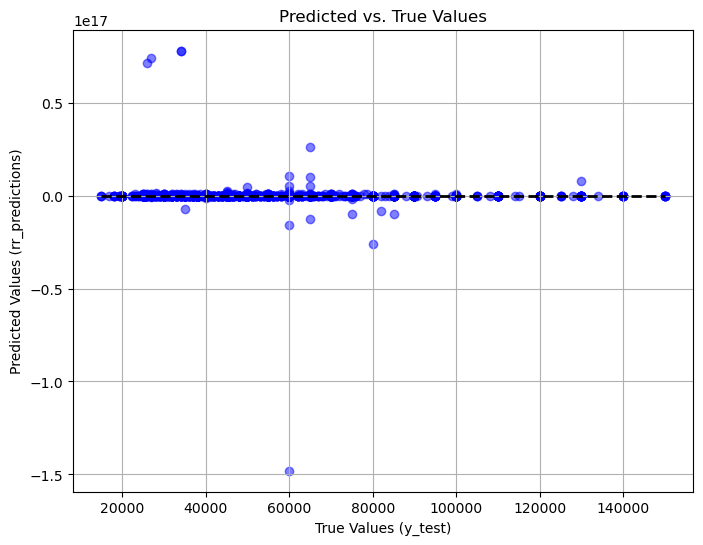

In [79]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rr_pred, c='blue', alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (rr_predictions)')
plt.title('Predicted vs. True Values')
plt.grid(True)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

In [80]:
from tensorflow import keras

# Determine the number of features in your input data
num_features = X_train.shape[1] 

# Create a Sequential neural network model
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to your training data
nn_model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch_size as needed

# Make predictions
nn_predictions = nn_model.predict(X_test)


Epoch 1/100
251/251 [==============================] - 2s 4ms/step - loss: 3715298048.0000
Epoch 2/100
251/251 [==============================] - 1s 4ms/step - loss: 3530530816.0000
Epoch 3/100
251/251 [==============================] - 1s 4ms/step - loss: 2945652224.0000
Epoch 4/100
251/251 [==============================] - 1s 4ms/step - loss: 2008822656.0000
Epoch 5/100
251/251 [==============================] - 1s 4ms/step - loss: 1118066816.0000
Epoch 6/100
251/251 [==============================] - 1s 4ms/step - loss: 633703232.0000
Epoch 7/100
251/251 [==============================] - 1s 4ms/step - loss: 493111296.0000
Epoch 8/100
251/251 [==============================] - 1s 4ms/step - loss: 460221696.0000
Epoch 9/100
251/251 [==============================] - 1s 4ms/step - loss: 444198720.0000
Epoch 10/100
251/251 [==============================] - 1s 4ms/step - loss: 432336480.0000
Epoch 11/100
251/251 [==============================] - 1s 4ms/step - loss: 422900384.0000
Epo

In [81]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, nn_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, nn_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, nn_predictions)
print("R-squared (R^2):", r_squared)

Mean Absolute Error (MAE): 14239.526640351836
Mean Squared Error (MSE): 392093910.3131987
R-squared (R^2): 0.32979605214332464


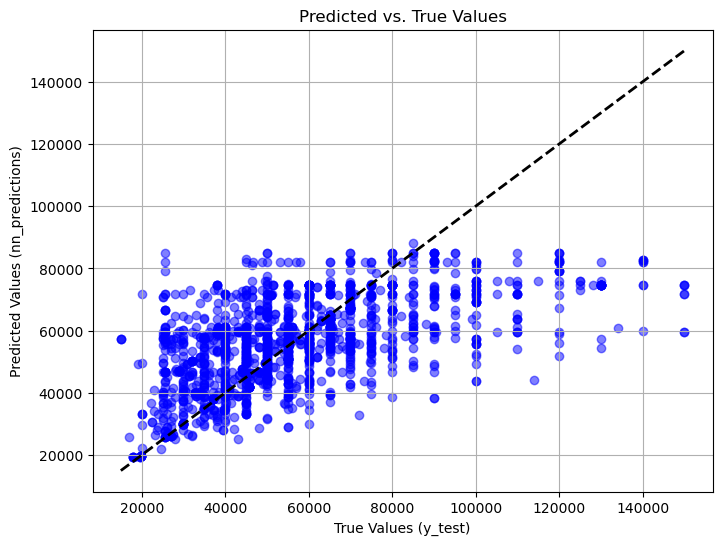

In [82]:
# Create a scatter plot for tensor flow
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions, c='blue', alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (nn_predictions)')
plt.title('Predicted vs. True Values')
plt.grid(True)

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

Mean Squared Error (MSE) for Polynomial Model: 125587698.43
R-squared (R2) for Polynomial Model: 0.54
Mean Absolute Error (MAE) for Polynomial Model: 11573.13


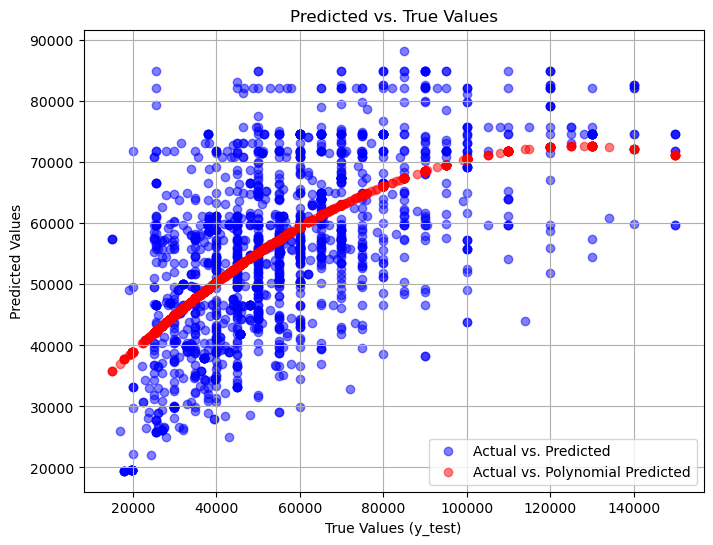

In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Convert y_test to a numpy array and reshape it
y_test_np = y_test.values.reshape(-1, 1)

# Create a polynomial regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(y_test_np, nn_predictions)

# Predict using the model
y_pred_poly = model.predict(y_test_np)

# Calculate Mean Squared Error (MSE) for the polynomial model (optional)
mse_poly = mean_squared_error(nn_predictions, y_pred_poly)
print(f"Mean Squared Error (MSE) for Polynomial Model: {mse_poly:.2f}")

# Calculate R-squared (R2) for the polynomial model
r2_poly = r2_score(y_test_np, y_pred_poly)
print(f"R-squared (R2) for Polynomial Model: {r2_poly:.2f}")

# Calculate Mean Absolute Error (MAE) for the polynomial model
mae_poly = mean_absolute_error(y_test_np, y_pred_poly)
print(f"Mean Absolute Error (MAE) for Polynomial Model: {mae_poly:.2f}")

# Plot the predictions against y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions, c='blue', alpha=0.5, label='Actual vs. Predicted')
plt.scatter(y_test, y_pred_poly, c='red', alpha=0.5, label='Actual vs. Polynomial Predicted')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.grid(True)
plt.legend()
plt.show()

### The polynomial model seems to be the best model using the R2 value of 0.54

## Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean

In [85]:
models = [lr, dr, rr, gb, svr,knn]

#create function to train a model and evaluate r2
def trainer_with_cv(model,X_train,y_train,X_test,y_test):
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print evaluation metric
    print('\nFor {}, Cross-Validation Scores are  {} \n'.format(model.__class__.__name__,scores))
    print('------------------------------------------------------------------------------------------------------')
    print('R_Square: %.3f' % (mean(scores))) 

In [86]:
for model in models:
    trainer_with_cv(model,X_train,y_train,X_test,y_test)


For LinearRegression, Cross-Validation Scores are  [-1.23292274e+23 -7.48326047e+21 -5.98727435e+23 -1.43986632e+23
 -1.10176131e+24] 

------------------------------------------------------------------------------------------------------
R_Square: -395050182259853515292672.000

For DecisionTreeRegressor, Cross-Validation Scores are  [0.33920336 0.41318636 0.41212462 0.35810437 0.36632325] 

------------------------------------------------------------------------------------------------------
R_Square: 0.378

For RandomForestRegressor, Cross-Validation Scores are  [0.37821309 0.43095192 0.44590778 0.38419103 0.40176821] 

------------------------------------------------------------------------------------------------------
R_Square: 0.408

For GradientBoostingRegressor, Cross-Validation Scores are  [0.33531023 0.3467302  0.36460986 0.32882396 0.33591346] 

------------------------------------------------------------------------------------------------------
R_Square: 0.342

For SVR, C

### Random Forest is returning the Best Model in terms of R2

In [99]:
y_test_df = pd.DataFrame({'True Values (y_test)': y_test.values})

# Convert nn_predictions and y_pred_poly to dataframes as before
nn_predictions_df = pd.DataFrame(nn_predictions, columns=['Neural Network Predictions'])
y_pred_poly_df = pd.DataFrame(y_pred_poly, columns=['Polynomial Model Predictions'])

# Concatenate dataframes horizontally
comparison_df = pd.concat([df['Job_Title_New'], y_test_df, nn_predictions_df, y_pred_poly_df], axis=1)
comparison_df.head(20)

,Job_Title_New,True Values (y_test),Neural Network Predictions,Polynomial Model Predictions
0,Software/Developer,38000.0,56266.097656,49279.741085
1,Software/Developer,50000.0,50430.625000,55122.907317
2,Software/Developer,80000.0,62356.679688,66050.751177
3,Cyber Security/IT Expert,60000.0,54444.906250,59349.660305
5,Software/Developer,57000.0,71782.625000,58142.968937
6,Software/Developer,80000.0,84945.281250,66050.751177
7,Software/Developer,60000.0,53394.382812,59349.660305
8,Devops Programmer,55000.0,50719.531250,57309.301107
9,Software/Developer,25000.0,31867.240234,42000.419485
10,Cyber Security/IT Expert,68000.0,54969.011719,62310.483070


### SUMMARY
- The salary range for tech roles is between 35k to 60k majorly as this returned the highest peak in the data
- Software/developers, data analysts, cybersecurity/IT have most job listings and in general most of the jobs are permenent/fulltime
- London, Manchester and Bristol are the top 3 cities that have the most Job listings with Wednesday as the day of week where most Jobs are advertised.
- Data scientist, cloud engineer have the top median earnings by salary, while Data analyst and intern/junior returned the least.
- The supervised machine learning performance results is not impressive as regards to the R2 value. This can be as a result of not enough data points.